# Initialisations

In [1]:
###  these imports from tf tutorial ###
# https://www.tensorflow.org/tutorials/keras/regression #

from __future__ import absolute_import, division, print_function, unicode_literals
import os
import pathlib

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

print(tf.__version__)

### regular imports too! ###

import pandas as pd ; pd.set_option('display.max_columns', 500)
import numpy as np
from numpy import random ; random.RandomState(seed = 69)
import matplotlib.pyplot as plt
import ipywidgets as widgets


C:\Users\jtd1g16\AppData\Local\Continuum\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\jtd1g16\AppData\Local\Continuum\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\jtd1g16\AppData\Local\Continuum\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\jtd1g16\AppData\Loc

1.14.0


# Bringing in data
Organics set only

In [6]:
data = pd.read_csv('DATA/org_removed_wild_ones.csv')

#data = pd.read_csv('DATA/organics.csv')
data = data.dropna(axis=0)
data['Constant'] = np.log(data.Constant)
data = data[['Constant', 'wt', 'logp', 'fraction_sp3',
             'ali_homo_rings', 'ali_hetero_rings',
             'amide_bonds',
             'aro_homo_rings', 'aro_hetero_rings',
             'hba', 'hbd', 'volume', 'tpsa',
             'asph', 'ecce', 'isf', 'npr1', 'npr2', 
             'pmi1', 'pmi2', 'pmi3', 'rog', 'si']]
data = data[['Constant', 'wt', 'logp', 'fraction_sp3',
             'hba', 'hbd', 'volume', 'tpsa']]

## Seperate off 13 molecules
Leave 4000 species for training/testing

In [7]:
random_list = []
gen_rand = input('Generate new set of random molecules? (y/n):\t' )
if gen_rand == 'y':
    for i in range(0, 13):
        random_list.append(random.randint(0, 4014))
    random_list
    random_choice = data.iloc[random_list]
    data_4000 = data.drop(random_list, axis=0)
    print(random_choice.Species)
if gen_rand == 'n':
    print('Not generating new set.')
    print(random_choice.Species)

Generate new set of random molecules? (y/n):	y


AttributeError: 'DataFrame' object has no attribute 'Species'

# Dragon data input

In [41]:
dragon_data = pd.read_csv('DATA/dragon_descriptors_with_constants.csv')
dragon_data.drop('Unnamed: 0', axis=1, inplace=True)
dragon_data.dropna(axis=0, how='any', inplace=True)

In [42]:
dragon_data.head()

,Constant,Sv,Se,Sp,Si,Mv,Me,Mp,Mi,nAT,nSK,nBT,nBO,nBM,SCBO,RBN,RBF,nDB,nTB,nAB,nH,nC,nN,nO,nP,nS,nF,nCL,nBR,nI,nHM,nHet,nX,H%,C%,N%,O%,X%,nCsp3,nCsp2,nCsp,P_VSA_m_1,P_VSA_m_2,P_VSA_m_3,P_VSA_m_4,P_VSA_m_5,P_VSA_v_1,P_VSA_v_2,P_VSA_v_3,P_VSA_v_4,P_VSA_e_1,P_VSA_e_2,P_VSA_e_3,P_VSA_e_4,P_VSA_e_5,P_VSA_e_6,P_VSA_p_1,P_VSA_p_2,P_VSA_p_3,P_VSA_p_4,P_VSA_i_1,P_VSA_i_2,P_VSA_i_3,P_VSA_i_4,P_VSA_s_5,P_VSA_s_6,nCp,nCs,nCt,nCq,nCrs,nCrt,nCrq,nCar,nCbH,nCb-,nCconj,nR=Cp,nR=Cs,nR=Ct,n=C=,nR#CH/X,nR#C-,nArNCO,nRSCN,nRNCS,nRCOOH,nArCOOH,nRCOOR,nArCOOR,nRCONH2,nArCONH2,nRCONHR,nArCONHR,nRCONR2,nArCONR2,nROCON,nArOCON,nRCOX,nArCOX,nRCOSR,nRCHO,nArCHO,nRCO,nArCO,nCONN,nC=O(O)2,nN=C-N<,nC(=N)N2,nRC=N,nArC=N,nRCNO,nArCNO,nRNH2,nArNH2,nRNHR,nArNHR,nRNR2,nArNR2,nN-N,nN=N,nRCN,nArCN,nN+,nNq,nRNHO,nArNHO,nRNNOx,nArNNOx,nRNO2,nArNO2,nN(CO)2,nC=N-N<,nROH,nArOH,nOHp,nOHs,nOHt,nROR,nArOR,nO(C=O)2,nSH,nRSR,nRSSR,nSO,nS(=O)2,nSO2OH,nSO2,nSO3,nSO4,nSO2N,nPO3,nPO4,nPR3,nP(=O)O2R,nP(=O)R3/nPR5,nCH2RX,nCHR2X,nCR3X,nR=CHX,nR=CRX,nCHRX2,nCR2X2,nR=CX2,nCRX3,nArX,nCXr,nCXr=,nCconjX,nAziridines,nOxiranes,nOxetanes,nPyrrolidines,nOxolanes,nPyrroles,nPyrazoles,nImidazoles,nFuranes,nThiophenes,nIsoxazoles,nThiazoles,nTriazoles,nPyridines,nPyrimidines,nPyrazines,n135-Triazines,nHDon,nHAcc,C-001,C-002,C-003,C-004,C-005,C-006,C-007,C-008,C-009,C-010,C-011,C-012,C-013,C-014,C-015,C-016,C-017,C-018,C-019,C-020,C-021,C-022,C-024,C-025,C-026,C-027,C-028,C-029,C-030,C-031,C-032,C-033,C-034,C-035,C-036,C-037,C-038,C-039,C-040,C-041,C-042,C-043,C-044,H-046,H-047,H-048,H-049,H-050,H-051,H-052,H-053,H-054,H-055,O-056,O-057,O-058,O-059,O-060,O-061,O-062,O-063,N-066,...,Br-092,Br-093,Br-094,Br-095,I-096,I-097,I-098,I-099,S-106,S-107,S-108,S-109,S-110,P-116,P-117,P-118,P-119,P-120,SsCH3,SdCH2,SssCH2,StCH,SdsCH,SaaCH,SsssCH,SddC,StsC,SdssC,SaasC,SaaaC,SssssC,SsNH2,SssNH,SdNH,SsssN,SdsN,SaaN,StN,SssssN+,SddsN,SaasN,SaaNH,SsOH,SdO,SssO,SaaO,SsssP,SdsssP,SsSH,SdS,SssS,SaaS,SdssS,SddssS,SsF,SsCl,SsBr,SsI,NsCH3,NdCH2,NssCH2,NtCH,NdsCH,NaaCH,NsssCH,NddC,NtsC,NdssC,NaasC,NaaaC,NssssC,NsNH2,NssNH,NdNH,NsssN,NdsN,NaaN,NtN,NssssN+,NddsN,NaasN,NaaNH,NsOH,NdO,NssO,NaaO,NsssP,NdsssP,NsSH,NdS,NssS,NaaS,NdssS,NddssS,NsF,NsCl,NsBr,NsI,CATS2D_00_DD,CATS2D_01_DD,CATS2D_02_DD,CATS2D_03_DD,CATS2D_04_DD,CATS2D_05_DD,CATS2D_06_DD,CATS2D_07_DD,CATS2D_08_DD,CATS2D_09_DD,CATS2D_01_DA,CATS2D_02_DA,CATS2D_03_DA,CATS2D_04_DA,CATS2D_05_DA,CATS2D_06_DA,CATS2D_07_DA,CATS2D_08_DA,CATS2D_09_DA,CATS2D_00_DP,CATS2D_01_DP,CATS2D_02_DP,CATS2D_03_DP,CATS2D_04_DP,CATS2D_05_DP,CATS2D_06_DP,CATS2D_07_DP,CATS2D_08_DP,CATS2D_09_DP,CATS2D_01_DN,CATS2D_02_DN,CATS2D_03_DN,CATS2D_04_DN,CATS2D_05_DN,CATS2D_06_DN,CATS2D_07_DN,CATS2D_08_DN,CATS2D_09_DN,CATS2D_02_DL,CATS2D_03_DL,CATS2D_04_DL,CATS2D_05_DL,CATS2D_06_DL,CATS2D_07_DL,CATS2D_08_DL,CATS2D_09_DL,CATS2D_01_AA,CATS2D_02_AA,CATS2D_03_AA,CATS2D_04_AA,CATS2D_05_AA,CATS2D_06_AA,CATS2D_07_AA,CATS2D_08_AA,CATS2D_09_AA,CATS2D_01_AP,CATS2D_02_AP,CATS2D_03_AP,CATS2D_04_AP,CATS2D_05_AP,CATS2D_06_AP,CATS2D_07_AP,CATS2D_08_AP,CATS2D_09_AP,CATS2D_01_AN,CATS2D_02_AN,CATS2D_03_AN,CATS2D_04_AN,CATS2D_05_AN,CATS2D_06_AN,CATS2D_07_AN,CATS2D_08_AN,CATS2D_09_AN,CATS2D_01_AL,CATS2D_02_AL,CATS2D_03_AL,CATS2D_04_AL,CATS2D_05_AL,CATS2D_06_AL,CATS2D_07_AL,CATS2D_08_AL,CATS2D_09_AL,CATS2D_00_PP,CATS2D_02_PP,CATS2D_03_PP,CATS2D_04_PP,CATS2D_05_PP,CATS2D_06_PP,CATS2D_07_PP,CATS2D_09_PP,CATS2D_01_PN,CATS2D_02_PN,CATS2D_03_PN,CATS2D_04_PN,CATS2D_05_PN,CATS2D_02_PL,CATS2D_03_PL,CATS2D_04_PL,CATS2D_05_PL,CATS2D_06_PL,CATS2D_07_PL,CATS2D_08_PL,CATS2D_09_PL,CATS2D_03_NN,CATS2D_04_NN,CATS2D_05_NN,CATS2D_01_NL,CATS2D_02_NL,CATS2D_03_NL,CATS2D_04_NL,CATS2D_05_NL,CATS2D_06_NL,CATS2D_07_NL,CATS2D_08_NL,CATS2D_09_NL,CATS2D_01_LL,CATS2D_02_LL,CATS2D_03_LL,CATS2D_04_LL,CATS2D_05_LL,CATS2D_06_LL,CATS2D_07_LL,CATS2D_08_LL,CATS2D_09_LL,Uc,Ui,Hy,TPSA(NO),TPSA(Tot),MLOGP,MLOGP2,SAtot,SAacc,SAdon,Vx,VvdwMG,VvdwZAZ,PDI,BLTF96,BLTD48,BLTA96,cRo5,DLS_01,DLS_02,DLS_03,DLS_04,DLS_05,DLS_06,DLS_07,DLS_cons,LLS_01,LLS_02
0,0.000

In [43]:
len(dragon_data)

3744

## Train test split

In [45]:
train_dataset = dragon_data.sample(frac=0.8, random_state=0)
test_dataset = dragon_data.drop(train_dataset.index)

## Inspect the data

In [14]:
plot_grid = input('Execute sns.pairplot? \nThis can take over 10 minutes if too many features are used. (y/n)')
if plot_grid == 'y':
    sns.pairplot(train_dataset, diag_kind='kde')
if plot_grid == 'n':
    pass

Execute sns.pairplot? 
This can take over 10 minutes if too many features are used. (y/n)n


Outlier in HBA - a few large values, so check these indices:

In [46]:
train_stats = train_dataset.describe()
train_stats.pop("Constant")
train_stats = train_stats.transpose()
train_stats

,count,mean,std,min,25%,50%,75%,max
Sv,2995.0,16.330964,8.693834,2.021,10.4020,14.547,20.1115,90.263
Se,2995.0,26.347439,14.791449,3.102,16.8620,23.069,31.1235,168.562
Sp,2995.0,17.434936,9.344939,2.006,11.1700,16.091,21.1510,101.604
Si,2995.0,29.442511,17.062304,2.840,18.7195,24.772,35.3635,197.092
Mv,2995.0,0.645703,0.128414,0.448,0.5400,0.617,0.7185,1.231
...,...,...,...,...,...,...,...,...
DLS_06,2995.0,0.956955,0.100243,0.330,1.0000,1.000,1.0000,1.000
DLS_07,2995.0,0.972621,0.116671,0.000,1.0000,1.000,1.0000,1.000
DLS_cons,2995.0,0.792321,0.122486,0.390,0.7000,0.790,0.9000,1.000
LLS_01,2995.0,0.762204,0.223503,0.000,0.6700,0.830,1.0000,1.000


## Seperate constants and features

In [47]:
train_labels = np.log(train_dataset.pop('Constant'))
test_labels = np.log(test_dataset.pop('Constant'))

# Normalise the data

In [48]:
def norm(x):
    return (x - train_stats['mean']) / train_stats['std']
normed_train_data = norm(train_dataset)
normed_test_data = norm(test_dataset)

# Build the model
Using the tutorial's parameters for now

In [49]:
def build_model():
    model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=[len(train_dataset.keys())]),
    layers.Dense(64, activation='relu'),
    layers.Dense(1)])

    optimizer = tf.keras.optimizers.RMSprop(0.0001)

    model.compile(loss='mse',
                  optimizer=optimizer,
                  metrics=['mae', 'mse'])
    return model
model = build_model()

# Inspect the model
## Simple description
Using `.summary` method prints a simple model description

In [50]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 64)                33536     
_________________________________________________________________
dense_7 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 65        
Total params: 37,761
Trainable params: 37,761
Non-trainable params: 0
_________________________________________________________________


## Try out the model
Take 10 samples from the training set and call model.predict

In [52]:
example_batch = train_dataset[:10]
example_result = model.predict(example_batch)
example_result

array([[ 33.11847 ],
       [ 30.126324],
       [ 63.525173],
       [ 33.64287 ],
       [127.371704],
       [ 76.40903 ],
       [ 74.16589 ],
       [ 51.408638],
       [ 70.79016 ],
       [ 83.77326 ]], dtype=float32)

# Train the model
Model trained for 1000 epochs (An epoch is one complete presentation of the data set to be learned to a learning machine)
`history` object records training and validation accuracy

In [53]:
# Display training progress by printing a single dot for each completed epoch
class PrintDot(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs):
        if epoch % 100 == 0:
            print('')
            print('.', end='')

EPOCHS = 1000

history = model.fit(
    train_dataset, train_labels,
    epochs=EPOCHS, validation_split = 0.2, verbose=0,
    callbacks=[PrintDot()])


.
.
.
.
.
.
.
.
.
.

## Visualise `history` object to see training progress

In [54]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,mean_absolute_error,mean_squared_error,val_loss,val_mean_absolute_error,val_mean_squared_error,epoch
995,2.241451,0.924659,2.241451,16.049672,2.077928,16.049673,995
996,2.226737,0.918635,2.226737,15.944485,2.092689,15.944485,996
997,2.286872,0.881154,2.286872,19.018302,2.458144,19.018303,997
998,2.397089,0.902010,2.397089,16.642613,2.141005,16.642614,998
999,2.458814,0.917633,2.458814,16.350949,2.075049,16.350950,999


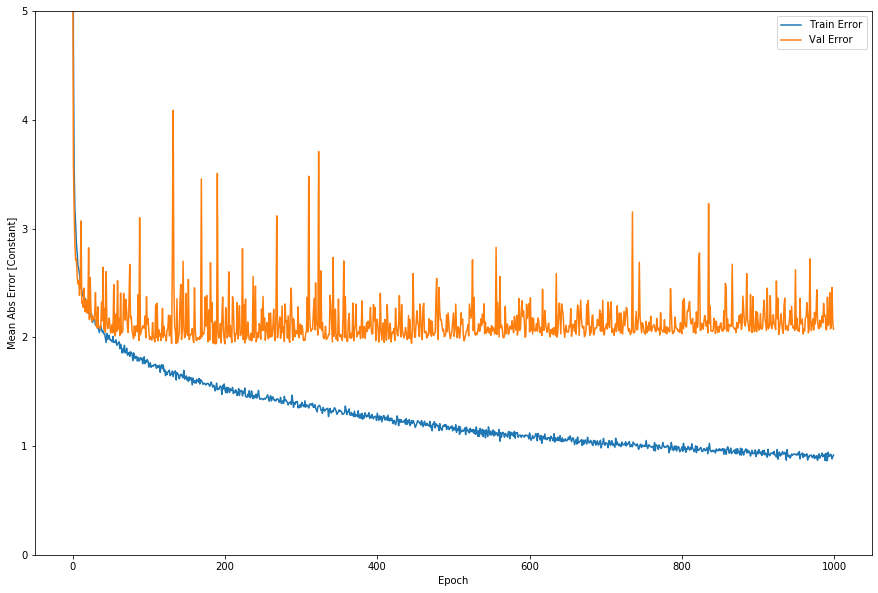

In [55]:
def plot_history(history):
    hist = pd.DataFrame(history.history)
    hist['epoch'] = history.epoch

    plt.figure(figsize = (15, 10))
    plt.xlabel('Epoch')
    plt.ylabel('Mean Abs Error [Constant]')
    plt.plot(hist['epoch'], hist['mean_absolute_error'],
             label='Train Error')
    plt.plot(hist['epoch'], hist['val_mean_absolute_error'],
             label = 'Val Error')
    plt.ylim([0,5])
    plt.legend()

plot_history(history)

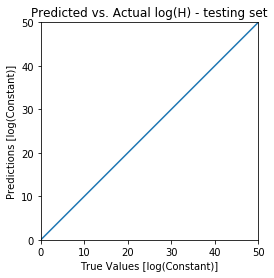

In [56]:
test_predictions = model.predict(normed_test_data).flatten()
train_predictions = model.predict(normed_train_data).flatten()

a = plt.axes(aspect='equal')
plt.scatter(test_labels, test_predictions)
plt.xlabel('True Values [log(Constant)]')
plt.ylabel('Predictions [log(Constant)]')
lims = [0, 50]
plt.xlim(lims)
plt.ylim(lims)
plt.title('Predicted vs. Actual log(H) - testing set')
_ = plt.plot(lims, lims)

In [59]:
X_list = list(test_dataset) ; colour_list = []
for feature in X_list:
    colour_list.append("test_dataset." + str(feature))
@widgets.interact()
def plot_scatter_colour(colour_by = colour_list,
                        colour_type = ['tab10', 'rainbow']):
    fig = plt.figure(figsize=(15, 10))
    fig = plt.scatter(test_labels, 
                      test_predictions,
                      c = eval(colour_by),
                      cmap = colour_type)
    plt.colorbar()
    plt.xlabel('Experimental')
    plt.ylabel('Predicted')
    plt.title('Predited vs experimental $log(H)$')
    plt.show()

interactive(children=(Dropdown(description='colour_by', options=('test_dataset.Sv', 'test_dataset.Se', 'test_d…

In [60]:
from sklearn.metrics import r2_score
r2_score(test_labels, test_predictions)

ValueError: Input contains NaN, infinity or a value too large for dtype('float32').

In [ ]:
error = test_predictions - test_labels
plt.hist(error, bins = 50)
plt.xlabel("Prediction Error [log(Constant)]")
_ = plt.ylabel("Count")

# Save the model

In [29]:
!pip install -q pyyaml h5py

In [30]:
checkpoint_path = "model_dump/tf/curated_model_19_11.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)

# Create a callback that saves the model's weights
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                 save_weights_only=True,
                                                 verbose=1)

# Train the model with the new callback
model.fit(train_dataset, 
          train_labels,  
          epochs=10,
          validation_data=(test_dataset,test_labels),
          callbacks=[cp_callback])  # Pass callback to training

# This may generate warnings related to saving the state of the optimizer.
# These warnings (and similar warnings throughout this notebook)
# are in place to discourage outdated usage, and can be ignored.

Train on 3042 samples, validate on 760 samples
Epoch 1/10
2720/3042 [=========================>....] - ETA: 0s - loss: 1786506.3353 - mean_absolute_error: 1181.7596 - mean_squared_error: 1786506.0000
Epoch 00001: saving model to model_dump/tf/curated_model_19_11.ckpt
3042/3042 [==============================] - 1s 298us/sample - loss: 1683964.1183 - mean_absolute_error: 1144.2323 - mean_squared_error: 1683963.6250 - val_loss: 799124.3250 - val_mean_absolute_error: 785.3750 - val_mean_squared_error: 799124.3750
Epoch 2/10
2272/3042 [=====================>........] - ETA: 0s - loss: 457745.6881 - mean_absolute_error: 574.7822 - mean_squared_error: 457745.7812
Epoch 00002: saving model to model_dump/tf/curated_model_19_11.ckpt
3042/3042 [==============================] - 0s 156us/sample - loss: 369971.3390 - mean_absolute_error: 496.3664 - mean_squared_error: 369971.3438 - val_loss: 90052.3965 - val_mean_absolute_error: 229.8866 - val_mean_squared_error: 90052.3984
Epoch 3/10
3008/3042 [=

In [31]:
model.load_weights(checkpoint_path)
print(model.evaluate(test_dataset, test_labels, verbose=2))
#print("Model loaded, accuracy: {:5.2f}%".format(100*acc))
model.metrics_names

760/760 - 0s - loss: 137.3187 - mean_absolute_error: 7.6140 - mean_squared_error: 137.3187
[137.31868410612407, 7.6140485, 137.31868]


['loss', 'mean_absolute_error', 'mean_squared_error']